In [129]:
import warnings
warnings.filterwarnings('ignore')

### Import lib

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Physical constants

In [131]:
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

### Transmission probability calculator (Matrix)

In [132]:
def T_fn(V0, E, L):
  V0_ev = V0 * eV
  E_ev = E * eV

  k1 = np.sqrt((2*m*E_ev) / (hbar**2))
  k2 = np.sqrt(((2*m) * (V0_ev-E_ev)) / (hbar**2))

  i=1j

  M_alpha_hat = 0.5 * np.array([
      [1-i*k2/k1, 1+i*k2/k1],
      [1+i*k2/k1, 1-i*k2/k1]
  ], dtype=complex)

  M_beta_hat = np.array([
      [np.exp(-k2*L), 0],
      [0, np.exp(k2*L)]
  ], dtype=complex)

  M_eta_hat = 0.5 * np.array([
      [1+i*k1/k2, 0],
      [1-i*k1/k2, 0]
  ], dtype=complex)

  O_hat = M_alpha_hat @ M_beta_hat @ M_eta_hat
  O_11 = O_hat[0, 0]

  T = 1.0 / np.abs(O_11)**2

  return T

### Transmission probability (T) vs Barrier width (L)

#### Parameters

In [133]:
V0 = 1
E = 0.7
L_list = np.linspace(0, 20e-9, 100)

In [134]:
T = []
for l in L_list:
  t = T_fn(V0, E, l)
  T.append(t)
T = np.array(T)

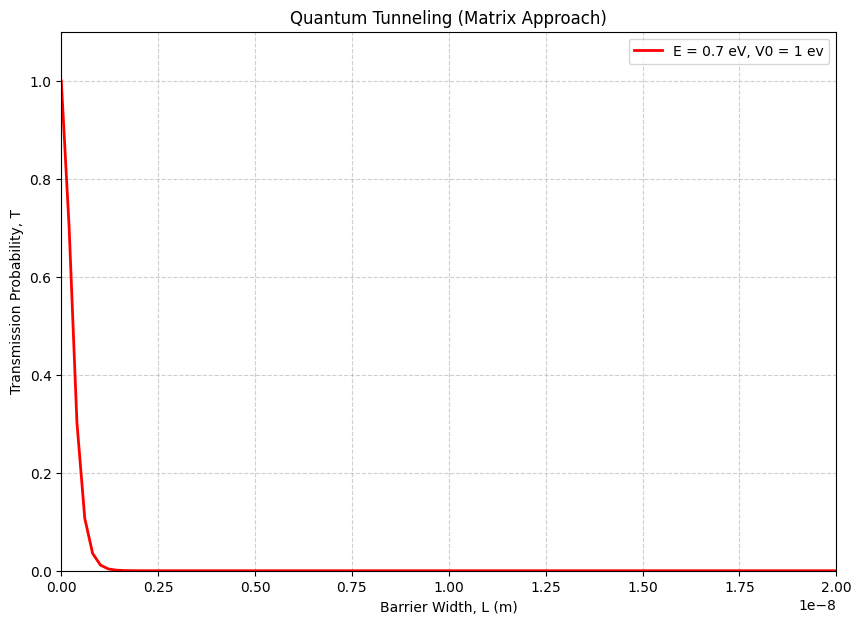

In [135]:
plt.figure(figsize=(10, 7))
plt.plot(L_list, T, label=f'E = {E} eV, V0 = {V0} ev', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Barrier Width, L (m)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, 1.1)
plt.xlim(0, L_list.max())
plt.savefig('matrix_T_L.png', dpi=200)

### Transmission probability (T) vs Barrier height (V0)

#### Parameters

In [136]:
E = 0.7
V0_list = np.linspace(E+1e-12, 20, 100)
L = 1e-10

In [137]:
T = []
for v in V0_list:
  t = T_fn(v, E, L)
  T.append(t)
T = np.array(T)

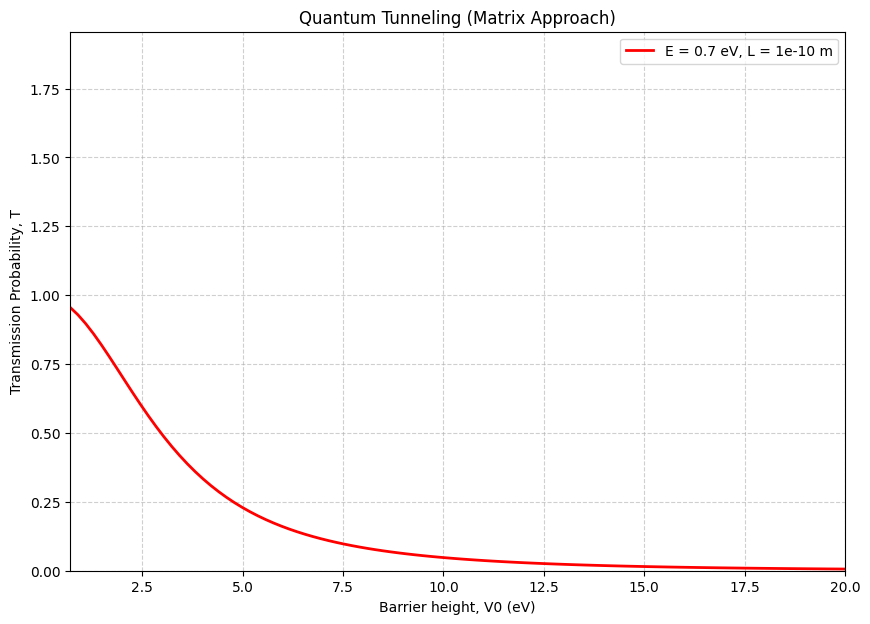

In [138]:
plt.figure(figsize=(10, 7))
plt.plot(V0_list, T, label=f'E = {E} eV, L = {L} m', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Barrier height, V0 (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(V0_list.min(), V0_list.max())
plt.savefig('matrix_T_V0.png', dpi=200)

### Transmission probability (T) vs Incident particle energy (E)

#### Parameters

In [139]:
V0 = 1
E_list = np.linspace(1e-12, V0-1e-12, 1000)
L = 1e-10

In [140]:
T = []
for e in E_list:
  t = T_fn(V0, e, L)
  T.append(t)
T = np.array(T)

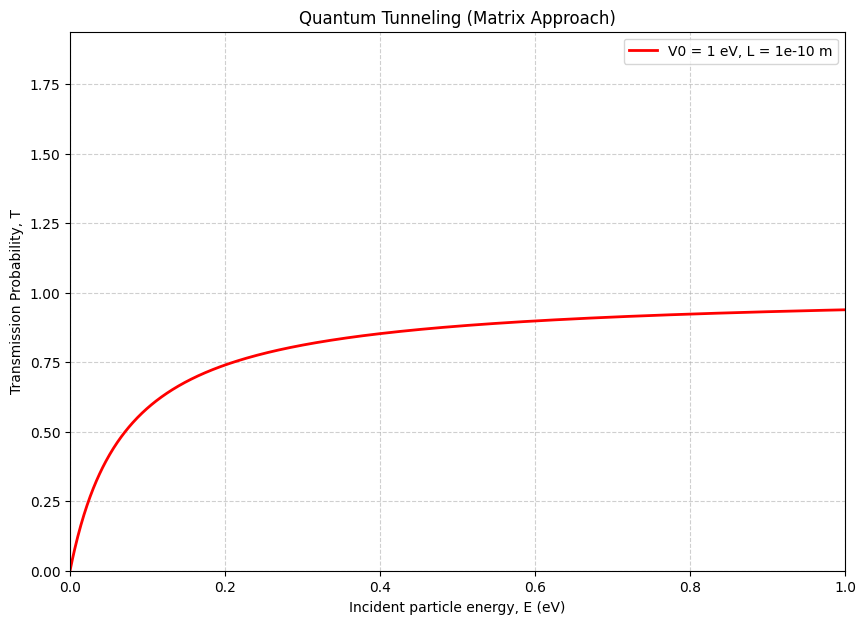

In [141]:
plt.figure(figsize=(10, 7))
plt.plot(E_list, T, label=f'V0 = {V0} eV, L = {L} m', lw=2, color='red')

plt.title('Quantum Tunneling (Matrix Approach)')
plt.xlabel('Incident particle energy, E (eV)')
plt.ylabel('Transmission Probability, T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, T.max()+1)
plt.xlim(E_list.min(), E_list.max())
plt.savefig('matrix_T_E.png', dpi=200)